In [6]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pickle as pickle
from pylab import *
%matplotlib inline

In [2]:
# Load the data
gdf_2018 = gpd.read_file('./data/processed data/SVI2018 TN counties with death rate HepVu/SVI2018_TN_counties_with_death_rate_HepVu.shp')

In [9]:
gdf_census = gpd.read_file('/Users/h6x/ORNL/git/opioid-risk-modeling/tennessee/data/processed data/SVI with HepVu census tracts/SVI2018 TN census tracts with death rate HepVu-5 classes/SVI2018_TN_census_tracts_with_death_rate_HepVu_5_classes.shp')

In [4]:
gdf_2018.head()

,ST,STATE,ST_ABBR,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,...,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,GEO ID,NOD_Rate,percentile,geometry
0,47,TENNESSEE,TN,Anderson,47001,"Anderson County, Tennessee",337.203175,75775,0,34932,...,0,6889,660,9.2,0.9,77087,47001,38.3,5,"POLYGON ((-84.44988 36.15105, -84.44823 36.152..."
1,47,TENNESSEE,TN,Bedford,47003,"Bedford County, Tennessee",473.638959,47558,0,18928,...,0,5321,655,11.3,1.4,44134,47003,21.8,1,"POLYGON ((-86.66330 35.47122, -86.66292 35.474..."
2,47,TENNESSEE,TN,Blount,47009,"Blount County, Tennessee",558.816658,128443,0,57296,...,0,11220,1033,8.8,0.8,117962,47009,33.4,4,"POLYGON ((-84.18832 35.61055, -84.18540 35.611..."
3,47,TENNESSEE,TN,Bradley,47011,"Bradley County, Tennessee",328.761662,104557,0,43377,...,0,12260,1000,11.8,1.0,100691,47011,26.6,3,"POLYGON ((-85.02664 35.13617, -85.02551 35.139..."
4,47,TENNESSEE,TN,Cannon,47015,"Cannon County, Tennessee",265.635253,13976,0,6131,...,0,1395,292,10.1,2.1,10145,47015,31.8,4,"POLYGON ((-86.20812 35.71560, -86.20658 35.716..."


In [5]:
# filter dataframe by FIPS == 47001
dataframe = gdf_2018[gdf_2018['FIPS'] == '47001']

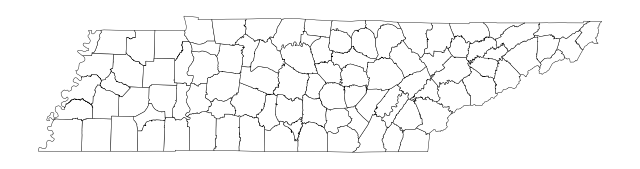

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_axis_off() 
gdf_2018.plot(ax=ax, edgecolor='black', linewidth=0.3, color="white")
plt.show()
plt.close()

In [14]:
gdf_census

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Shape_Leng,Shape_Area,NOD_Rate,percentile,geometry
0,47,TENNESSEE,TN,47001,Anderson,47001980100,"Census Tract 9801, Anderson County, Tennessee",16.991242,0,12,...,0,12,-999.0,-999.0,8840,0.401396,0.004796,38.3,>80%,"POLYGON ((-84.30167 35.97862, -84.29421 35.982..."
1,47,TENNESSEE,TN,47009,Blount,47009980100,"Census Tract 9801, Blount County, Tennessee",2.483479,5,9,...,0,12,0.0,100.0,2303,0.119941,0.000641,33.4,60%-80%,"POLYGON ((-84.01403 35.80881, -84.00916 35.812..."
2,47,TENNESSEE,TN,47017,Carroll,47017980100,"Census Tract 9801, Carroll County, Tennessee",18.889215,0,12,...,0,12,-999.0,-999.0,701,0.356972,0.004889,18.3,<20%,"POLYGON ((-88.70523 35.82485, -88.70462 35.828..."
3,47,TENNESSEE,TN,47029,Cocke,47029980100,"Census Tract 9801, Cocke County, Tennessee",26.536730,0,12,...,0,12,-999.0,-999.0,3,0.468744,0.006848,29.3,60%-80%,"POLYGON ((-83.28079 35.74700, -83.28016 35.749..."
4,47,TENNESSEE,TN,47037,Davidson,47037013000,"Census Tract 130, Davidson County, Tennessee",5.727093,910,386,...,0,12,-999.0,-999.0,11383,0.210848,0.001592,34.8,>80%,"POLYGON ((-86.91273 36.19354, -86.91046 36.198..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,47,TENNESSEE,TN,47157,Shelby,47157003200,"Census Tract 32, Shelby County, Tennessee",0.552846,3860,329,...,163,108,4.6,3.0,4580,0.048356,0.000142,17.0,<20%,"POLYGON ((-90.00407 35.13561, -90.00381 35.135..."
1493,47,TENNESSEE,TN,47157,Shelby,47157003700,"Census Tract 37, Shelby County, Tennessee",0.268327,1175,108,...,132,71,11.6,6.1,7778,0.037767,0.000069,17.0,<20%,"POLYGON ((-90.03483 35.13866, -90.03374 35.138..."
1494,47,TENNESSEE,TN,47157,Shelby,47157003800,"Census Tract 38, Shelby County, Tennessee",0.276794,822,111,...,70,47,8.5,5.8,11363,0.033894,0.000071,17.0,<20%,"POLYGON ((-90.03349 35.14052, -90.03274 35.145..."
1495,47,TENNESSEE,TN,47157,Shelby,47157007300,"Census Tract 73, Shelby County, Tennessee",0.740207,4851,746,...,477,282,10.2,5.5,15361,0.060052,0.000190,17.0,<20%,"POLYGON ((-89.94575 35.11546, -89.94555 35.120..."


In [18]:
# filter dataframe by FIPS == 47001
dataframe2 = gdf_census[gdf_census['STCNTY'] == '47157']

In [19]:
dataframe2

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Shape_Leng,Shape_Area,NOD_Rate,percentile,geometry
13,47,TENNESSEE,TN,47157,Shelby,47157021200,"Census Tract 212, Shelby County, Tennessee",0.880289,3539,441,...,0,12,-999.0,-999.0,5137,0.074910,0.000225,17.0,<20%,"POLYGON ((-89.87954 35.15648, -89.87477 35.160..."
14,47,TENNESSEE,TN,47157,Shelby,47157980100,"Census Tract 9801, Shelby County, Tennessee",7.384925,76,122,...,50,87,65.8,28.4,26237,0.245325,0.001890,17.0,<20%,"POLYGON ((-89.99144 35.06058, -89.99113 35.062..."
15,47,TENNESSEE,TN,47157,Shelby,47157980200,"Census Tract 9802, Shelby County, Tennessee",15.933105,0,12,...,0,12,-999.0,-999.0,4821,0.319646,0.004507,17.0,<20%,"POLYGON ((-90.18866 35.07574, -90.18139 35.091..."
16,47,TENNESSEE,TN,47157,Shelby,47157980300,"Census Tract 9803, Shelby County, Tennessee",37.552000,0,12,...,0,12,-999.0,-999.0,816,0.618020,0.010097,17.0,<20%,"POLYGON ((-90.31030 35.00430, -90.30988 35.009..."
17,47,TENNESSEE,TN,47157,Shelby,47157980400,"Census Tract 9804, Shelby County, Tennessee",7.039666,724,128,...,0,12,-999.0,-999.0,4083,0.196406,0.001804,17.0,<20%,"POLYGON ((-89.87853 35.15042, -89.85903 35.153..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,47,TENNESSEE,TN,47157,Shelby,47157003200,"Census Tract 32, Shelby County, Tennessee",0.552846,3860,329,...,163,108,4.6,3.0,4580,0.048356,0.000142,17.0,<20%,"POLYGON ((-90.00407 35.13561, -90.00381 35.135..."
1493,47,TENNESSEE,TN,47157,Shelby,47157003700,"Census Tract 37, Shelby County, Tennessee",0.268327,1175,108,...,132,71,11.6,6.1,7778,0.037767,0.000069,17.0,<20%,"POLYGON ((-90.03483 35.13866, -90.03374 35.138..."
1494,47,TENNESSEE,TN,47157,Shelby,47157003800,"Census Tract 38, Shelby County, Tennessee",0.276794,822,111,...,70,47,8.5,5.8,11363,0.033894,0.000071,17.0,<20%,"POLYGON ((-90.03349 35.14052, -90.03274 35.145..."
1495,47,TENNESSEE,TN,47157,Shelby,47157007300,"Census Tract 73, Shelby County, Tennessee",0.740207,4851,746,...,477,282,10.2,5.5,15361,0.060052,0.000190,17.0,<20%,"POLYGON ((-89.94575 35.11546, -89.94555 35.120..."


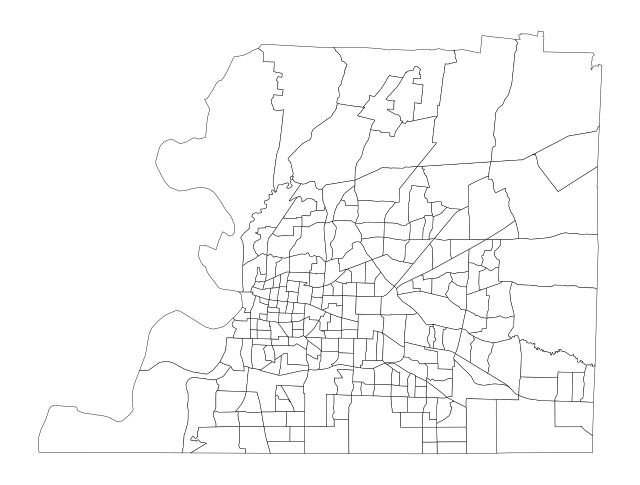

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_axis_off() 
dataframe2.plot(ax=ax, edgecolor='black', linewidth=0.3, color="white")
plt.show()
plt.close()